# 超参数

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

## 一个识别手写数字的例子

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [6]:
np.shape(digits.data)

(1797, 64)

特征

In [7]:
X = digits.data

分类

In [8]:
y = digits.target
np.shape(y)

(1797,)

## 可视化

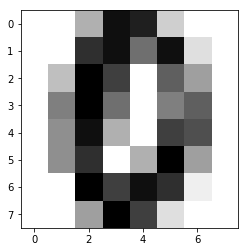

In [9]:
some_digit = X[666]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

## train test split

In [10]:
from c1_knn.model_selection import train_test_split
from c1_knn.kNN import KNNClassifier


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [12]:
my_knn_clf = KNNClassifier(k=3)

In [13]:
my_knn_clf.fit(X_train, y_train)

kNN(k=3)

In [14]:
y_predict = my_knn_clf.predict(X_test)
# 正确率
np.sum(y_predict==y_test) / np.shape(y_test)[0]

0.99164345403899723

### 把统计正确率封装为一个方法

In [15]:
from c1_knn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.99164345403899723

## sklearn中的accuracy_score

In [16]:
from sklearn.model_selection._split import train_test_split as train_test_spl
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.metrics import accuracy_score as score


In [17]:
X_train, X_test, y_train, y_test = train_test_spl(X, y, test_size=0.2, random_state=666)

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
y_predict = knn_clf.predict(X_test)

In [20]:
score(y_test,y_predict)

0.98888888888888893

In [21]:
knn_clf.score(X_test, y_test)

0.98888888888888893

两个score的结果一样